In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from hw_bayesian import *

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
X, y = import_dataset('dataset.csv')
model = BayesianLogisticRegression()
model.fit(X, y)

/home/majbc1999/miniconda3/envs/bayesian/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 73 seconds.


In [5]:
intercept, beta1, beta2 = model.get_betas()

In [6]:
model.trace

<MultiTrace: 2 chains, 10000 iterations, 3 variables>

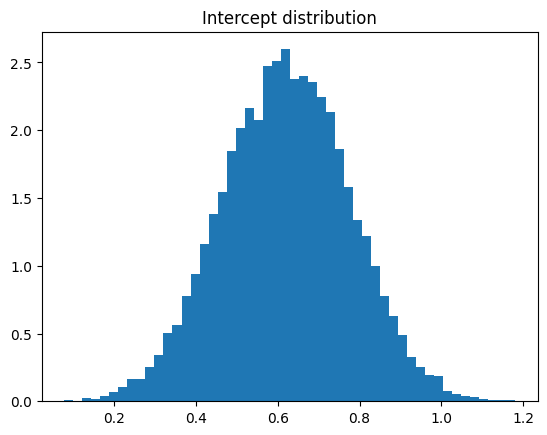

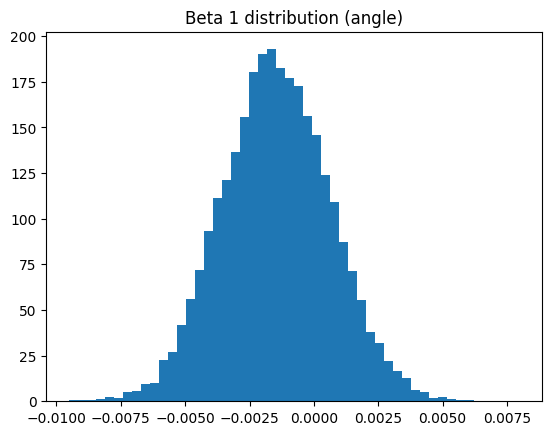

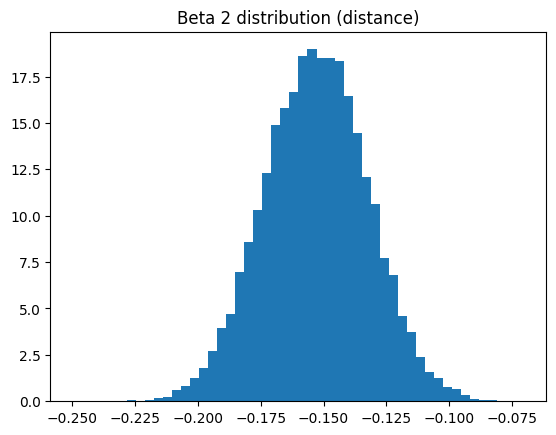

In [7]:
model.print_plots()

In [18]:
df = model.statistics()

df

,coef,mean,std,2.5%,97.5%
0,intercept,0.622084,0.158096,0.315657,0.927920
1,beta_1,-0.001483,0.002151,-0.005616,0.002673
2,beta_2,-0.153256,0.020377,-0.193391,-0.113865


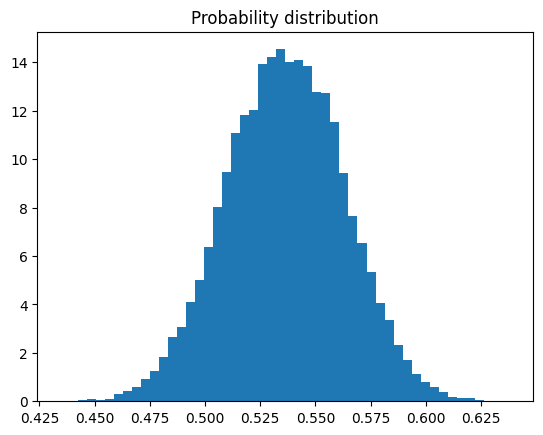

array([0.57367937, 0.56307499, 0.57318098, ..., 0.54790809, 0.53658005,
       0.52547289])

In [9]:
model.predict_instance_distribution(np.array([10, 3]), show_hist=True)